# Домашнее задание "Теория оптимизации".

# Задание.

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

In [2]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

In [3]:
# Ackley function
def ackley_function(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

In [15]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley_function, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [20]:
result_1 = differential_evolution(ackley_function, bounds, strategy='best1bin', 
                                popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.2, 
                                seed=42, updating='immediate')
result_1.x, result_1.fun

(array([0., 0.]), 4.440892098500626e-16)

In [21]:
result_2 = differential_evolution(ackley_function, bounds, strategy='rand1exp', 
                                popsize=20, tol=0.3, mutation=(0.5, 1), recombination=0.7, 
                                seed=42, updating='deferred')
result_2.x, result_2.fun

(array([ 5.09656527e-10, -2.85438184e-11]), 1.4437842033032666e-09)

In [91]:
# Если tol > 0.2, то количество итераций становится = 1. С чем это связано?
result_2.nit

1

In [22]:
result_3 = differential_evolution(ackley_function, bounds, strategy='currenttobest1exp', 
                                popsize=100, tol=0.01, mutation=(0.0001, 1.9), recombination=0.7, 
                                seed=42, updating='immediate')
result_3.x, result_3.fun

(array([0., 0.]), 4.440892098500626e-16)

In [96]:
result_3.nit

1000

In [23]:
result_4 = differential_evolution(ackley_function, bounds, strategy='rand2bin', 
                                popsize=15, tol=0.01, mutation=(0.0001, 1.9), recombination=0.1, 
                                seed=42, updating='immediate')
result_4.x, result_4.fun

(array([0., 0.]), 4.440892098500626e-16)

In [6]:
result_4.nit

229

In [24]:
result_5 = differential_evolution(ackley_function, bounds, strategy='best2exp', 
                                popsize=115, tol=0.1, mutation=(0.1, 1), recombination=0.8, 
                                seed=42, updating='deferred')
result_5.x, result_5.fun

(array([0., 0.]), 4.440892098500626e-16)

In [11]:
result_5.nit

123

In [29]:
popsize_list = list(range(100))
nit_list = []

for i in popsize_list:
    trial_result = differential_evolution(ackley_function, bounds, strategy='best1bin', 
                                popsize=i, tol=0.01, mutation=(0.5, 1), recombination=0.1, 
                                seed=42, updating='immediate')
    nit_list.append(trial_result.nit)
nit_list

[19,
 19,
 19,
 135,
 121,
 57,
 135,
 112,
 127,
 115,
 123,
 123,
 120,
 122,
 118,
 126,
 120,
 123,
 115,
 116,
 124,
 119,
 120,
 119,
 118,
 121,
 121,
 119,
 113,
 116,
 119,
 117,
 122,
 118,
 123,
 118,
 122,
 119,
 119,
 122,
 122,
 117,
 116,
 117,
 128,
 123,
 122,
 120,
 121,
 118,
 117,
 125,
 121,
 122,
 130,
 120,
 126,
 122,
 116,
 122,
 121,
 115,
 117,
 122,
 125,
 117,
 122,
 122,
 122,
 127,
 119,
 124,
 121,
 121,
 124,
 119,
 120,
 121,
 119,
 118,
 119,
 115,
 117,
 121,
 122,
 125,
 118,
 121,
 122,
 122,
 119,
 121,
 120,
 117,
 124,
 117,
 122,
 122,
 121,
 118]

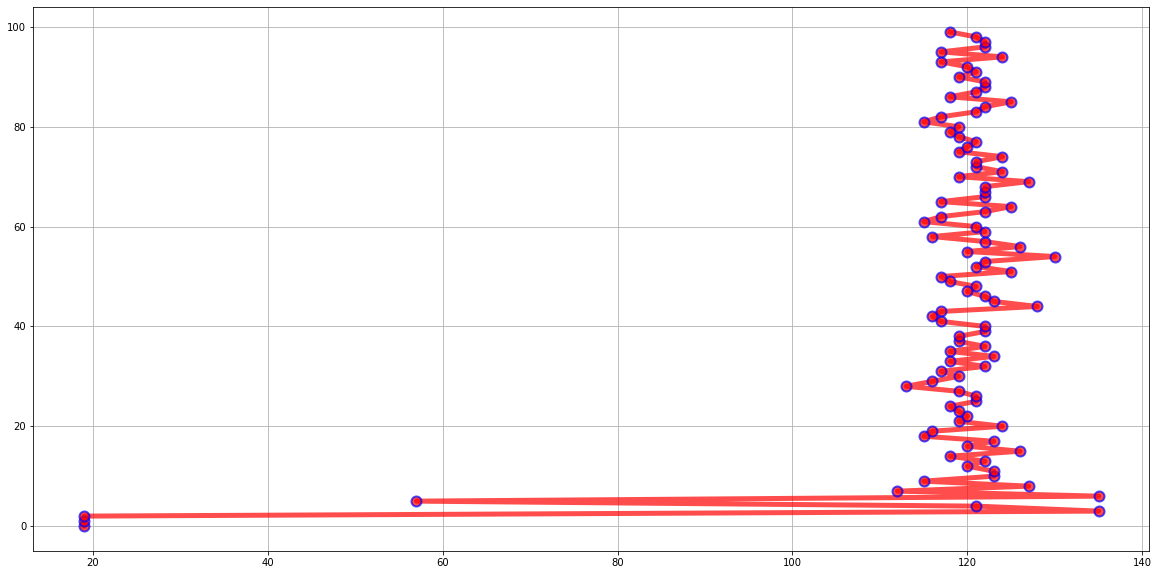

In [30]:
x = nit_list
y = popsize_list
plt.figure(figsize=(20, 10))
plt.plot(x, y, 'o-r', alpha=0.7, label="first", lw=5, mec='b', mew=2, ms=10)
plt.grid(True)

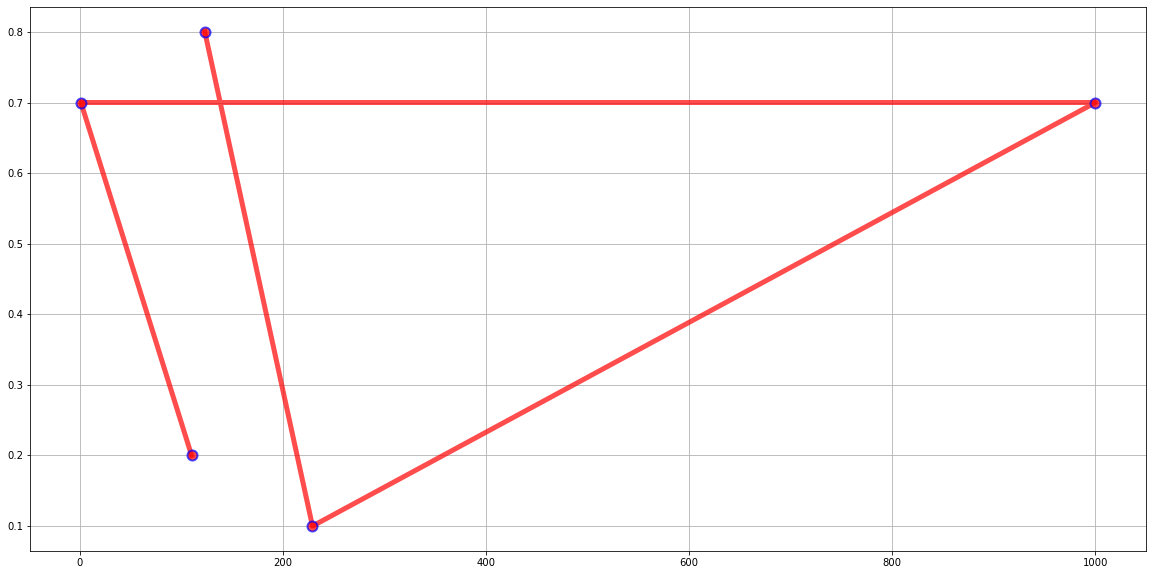

In [28]:
x = [result_1.nit, result_2.nit, result_3.nit, result_4.nit, result_5.nit]
y = [0.2, 0.7, 0.7, 0.1, 0.8]
plt.figure(figsize=(20, 10))
plt.plot(x, y, 'o-r', alpha=0.7, label="first", lw=5, mec='b', mew=2, ms=10)
plt.grid(True)

In [ ]:
# Не понимаю совершенно, что требуется в задании:
# "Постройте графики количества итераций оптимизации функции ackley от значения параметра."
# Как построить такие графики и что они должны показывать? От какого параметра нужно строить, если в задании их 6?

# Дополнительное задание.
Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [1]:
import numpy as np
from scipy.optimize import differential_evolution

In [69]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [124]:
strategies = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp',
             'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin',
             'rand2bin', 'rand1bin']

In [149]:
nit = 10000
for i in strategies:
    result_1 = differential_evolution(ackley, bounds, strategy=i, seed=42, updating='immediate')
    result_2 = differential_evolution(ackley, bounds, strategy=i, seed=42, updating='deferred')
    if result_1.nit < result_2.nit:
        if nit > result.nit:
            nit = result_1.nit
            params = {'strategy': i, 'updating': 'immediate'}
    elif result_1.nit > result_2.nit:
        if nit > result.nit:
            nit = result_2.nit
            params = {'strategy': i, 'updating': 'deferred'}
print(f'Параметры с минимальным количеством итераций: {params}, количество итераций: {nit}')

Параметры с минимальным количеством итераций: {'strategy': 'best1bin', 'updating': 'immediate'}, количество итераций: 90
